<a href="https://colab.research.google.com/github/Txlu-OG/Learn/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment Supervised machine Learning - Regression**

### **_House Price Prediction Using Boston Housing Data_**
This dataset provides information about house prices in Bolton. House Price Prediction


**In this notebook, you'll follow the basic machine learning process to build a regression model to predict house prices using the "Boston Housing Dataset" from sklearn. The regression model will either be a Decision Tree or Random Forest regressor.**



---



### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a regression model.**


The following is a description of each column in the dataset:

Dataset Features (Bolton Housing):

* CRIM: Crime rate by town
* ZN: Proportion of residential land zoned for large lots
* INDUS: Proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: Nitric oxide concentration (parts per 10 million)
* RM: Average number of rooms per dwelling
* AGE: Proportion of owner-occupied units built before 1940
* DIS: Weighted distances to five Boston employment centers
* RAD: Index of accessibility to radial highways
* TAX: Full-value property tax rate per `$10,000`
* PTRATIO: Pupil-teacher ratio by town
* B: Proportion of Black population
* LSTAT: Percentage of lower status of the population
* MEDV (Target): Median value of owner-occupied homes in `$1,000s`



**Dataset is from sklearn Datasets**

In [2]:
# --- Imports ---
# TODO: Import all the necessary libraries for data handling, visualization, and model building.
# Example: import pandas as pd
# Add your imports here:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- Data Collection and Loading ---
# TODO: Load the 'Boston Housing' dataset from sklearn and convert it into a pandas DataFrame.
# Hint: Use `load_boston()` from `sklearn.datasets`

# Load dataset and convert to DataFrame:

# Add your code here:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame.copy()
df.columns = [c.upper() for c in df.columns]
y = df["MEDV"]
X = df.drop(columns=["MEDV"])

In [3]:
# --- Quick Check of Data ---
# TODO: Display the first few rows of the dataset to understand its structure.
# Hint: Use `.head()` to inspect the first few rows.

# Add your code here:
print("\nHead:")
print(df.head())


Head:
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [4]:
# TODO: Check the features and target variable. Identify which is continuous and categorical if applicable.
# Hint: Use `.info()` and `.describe()` to inspect data types and statistical properties.

# Add your code here:
print("Dataset Info:")
df.info()

print("\nDataset Description:")
print(boston.DESCR)

print("\nData Description:")
print(df.describe)

# --- EDA and Data Preprocessing ---
# TODO: Check for missing/null values.
# Hint: Use `.isnull().sum()` to check for null values.

# Add your code here:
print("Missing values in each column:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB

Dataset Description:
**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean ai

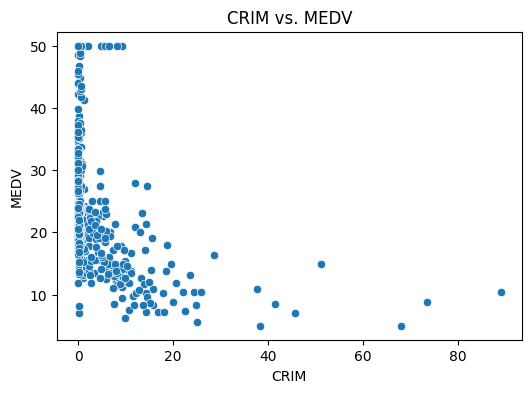

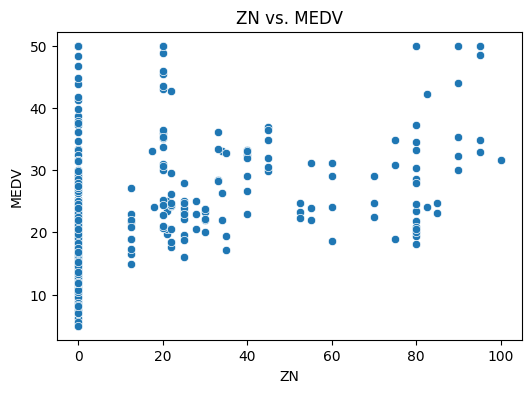

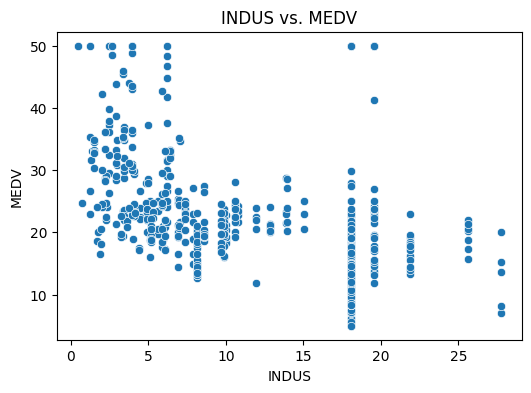

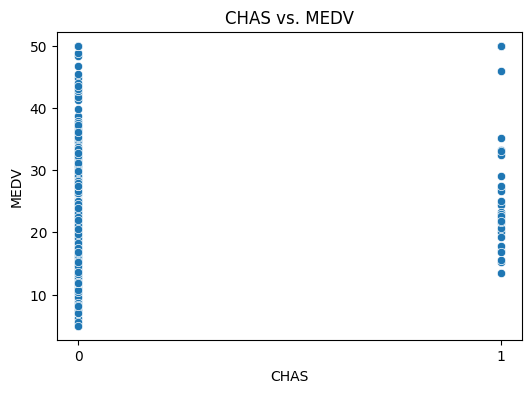

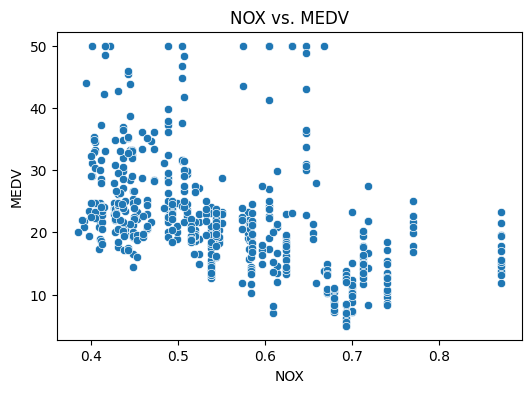

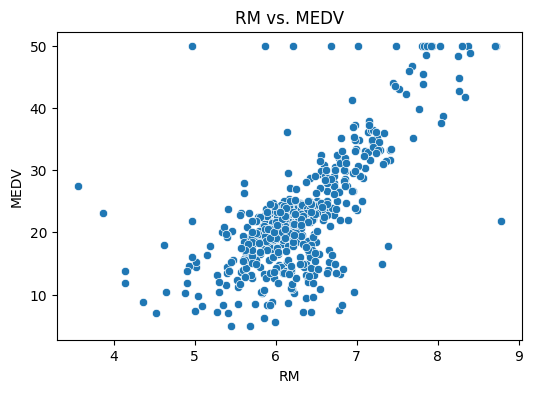

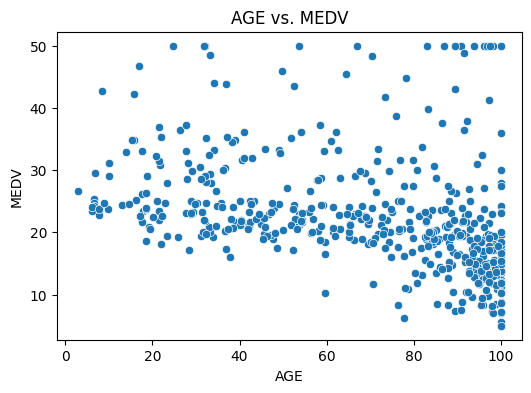

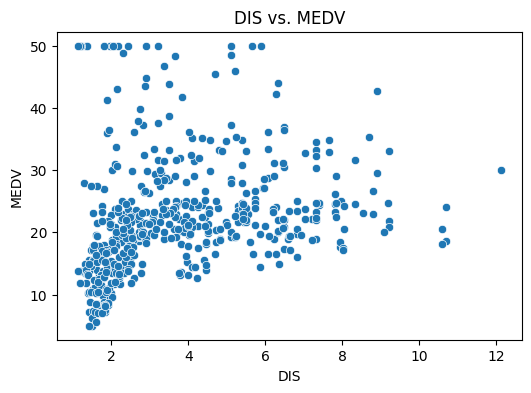

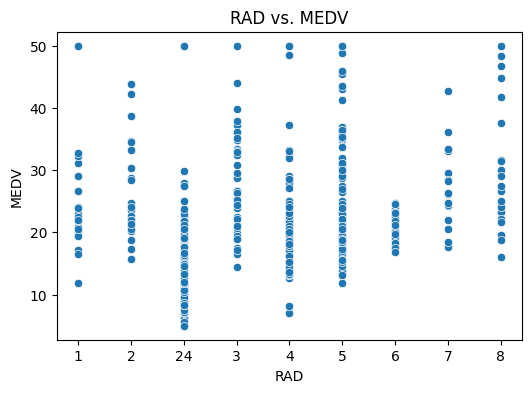

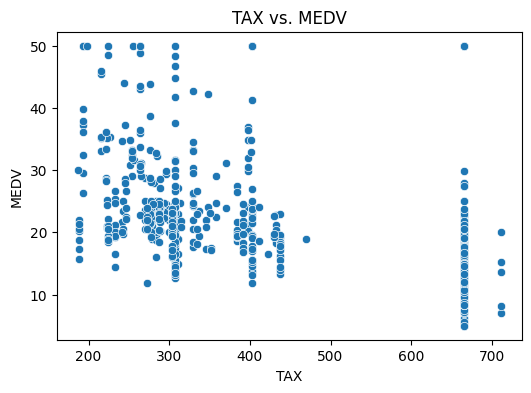

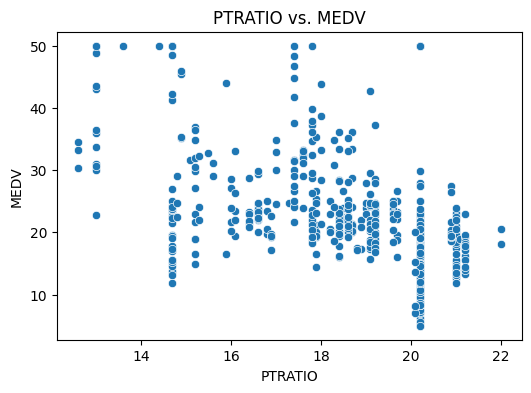

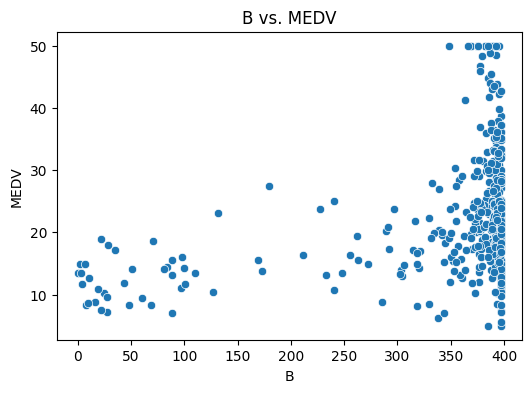

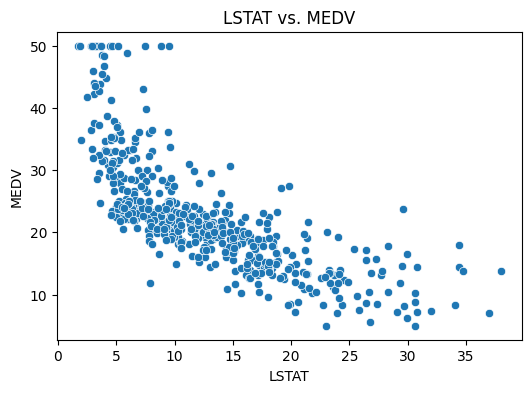

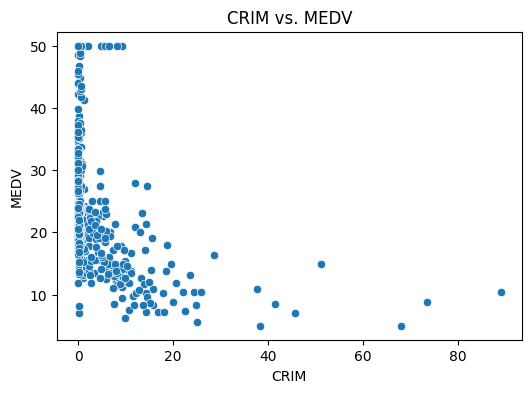

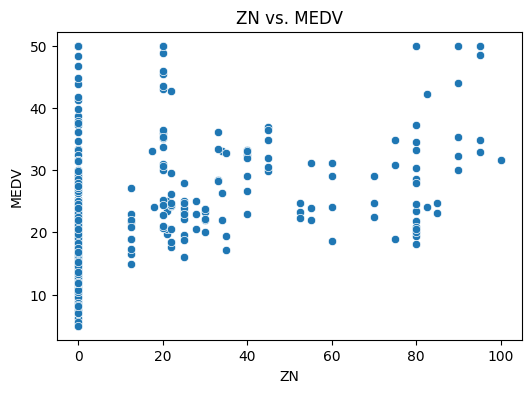

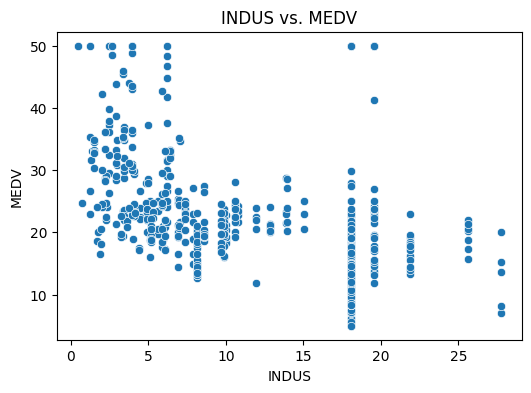

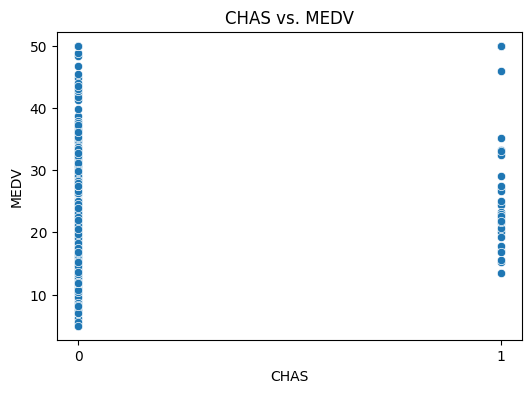

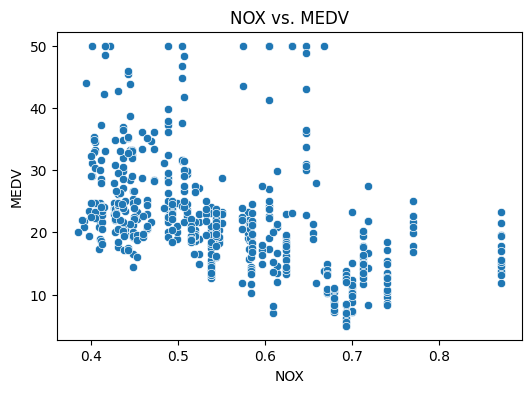

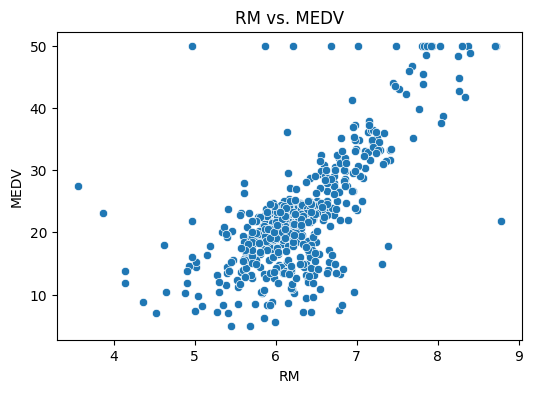

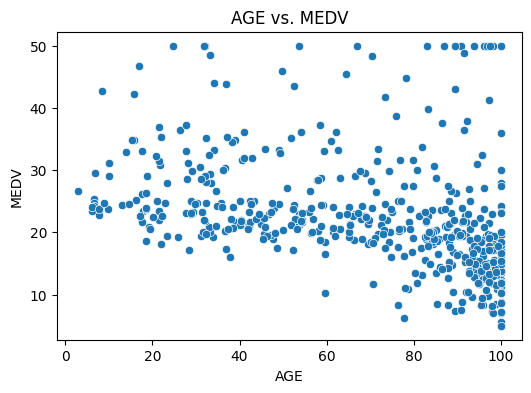

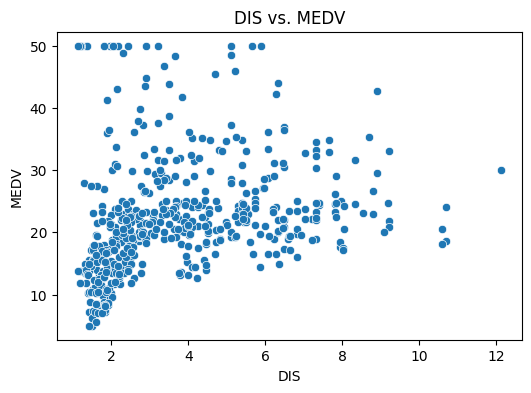

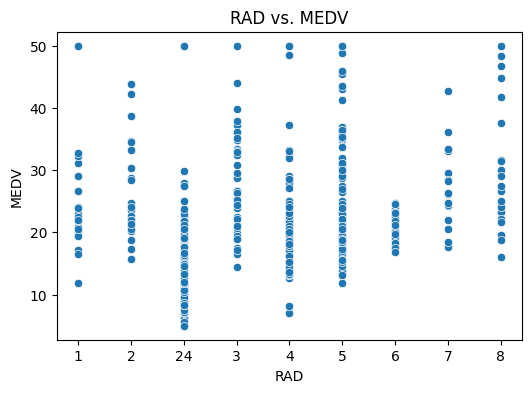

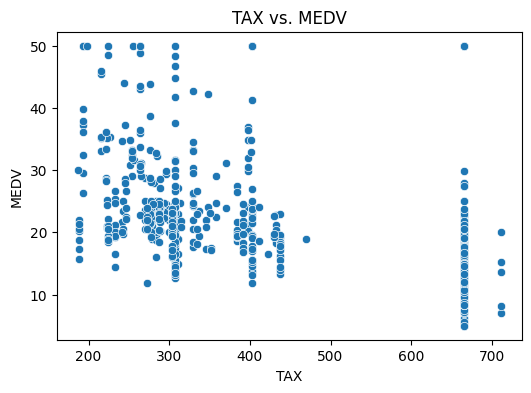

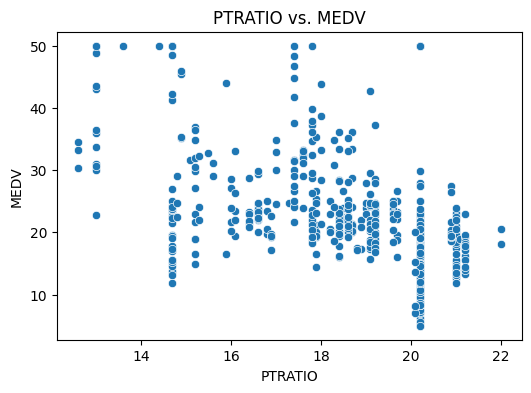

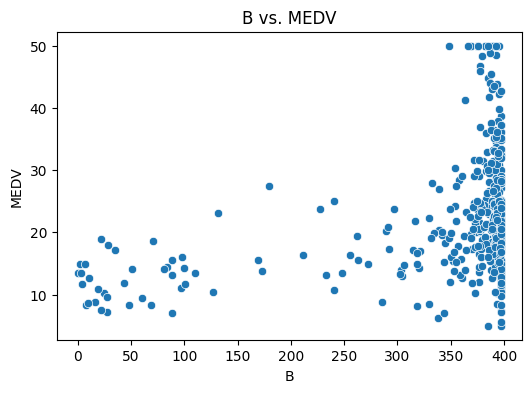

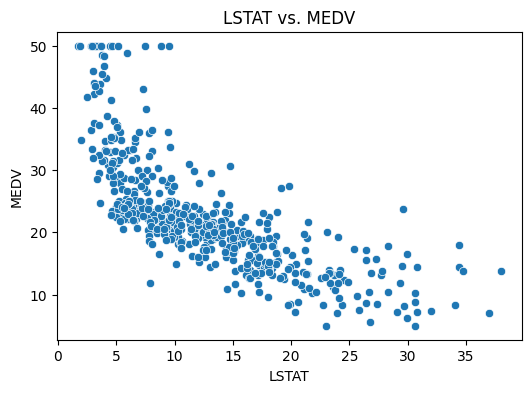

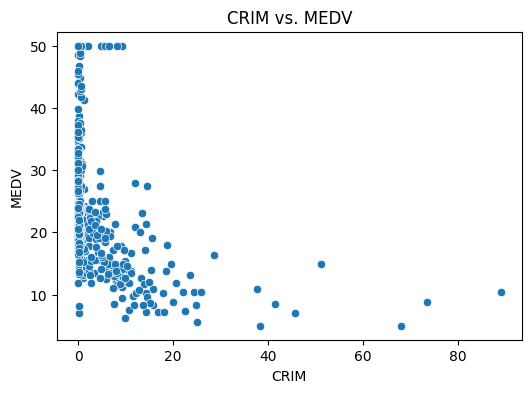

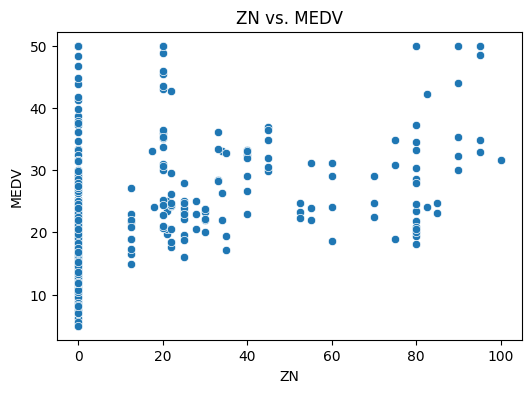

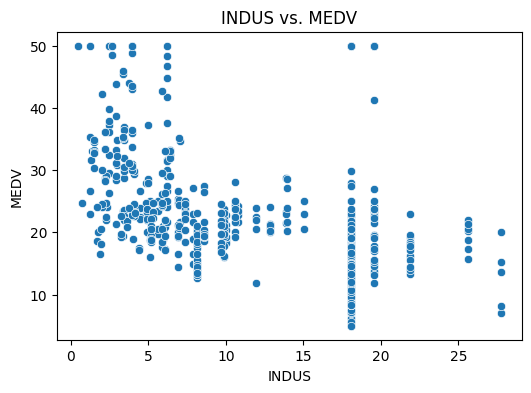

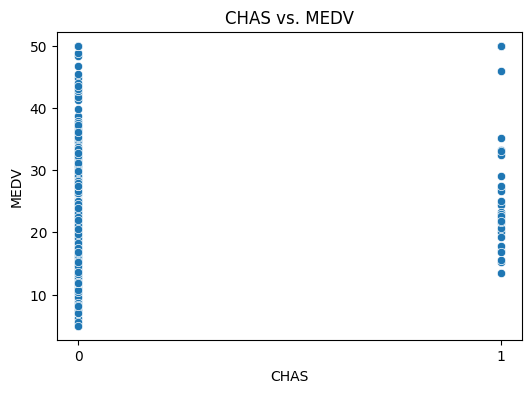

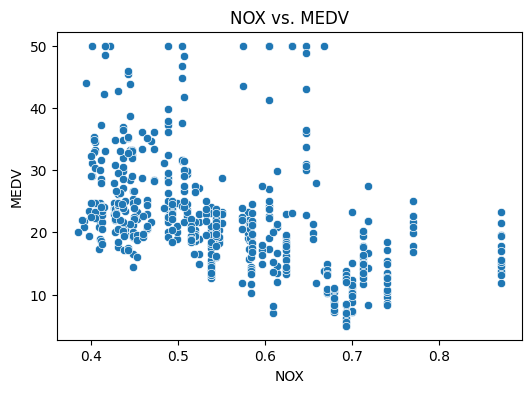

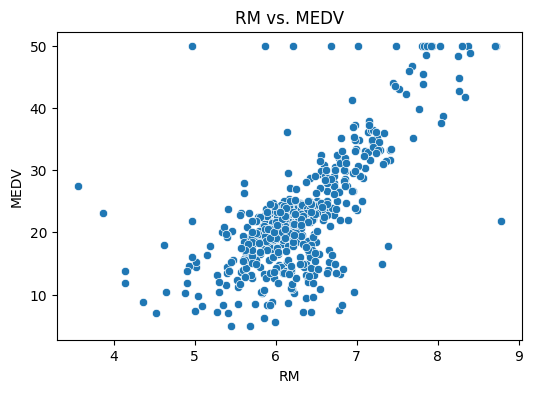

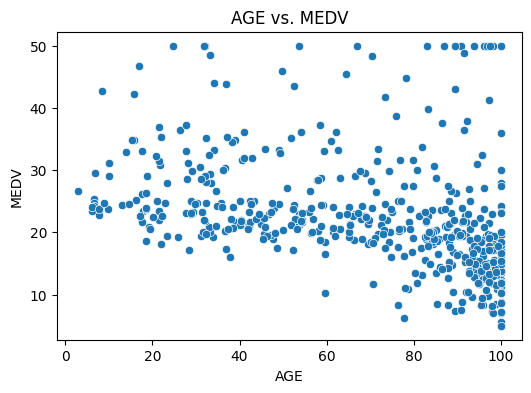

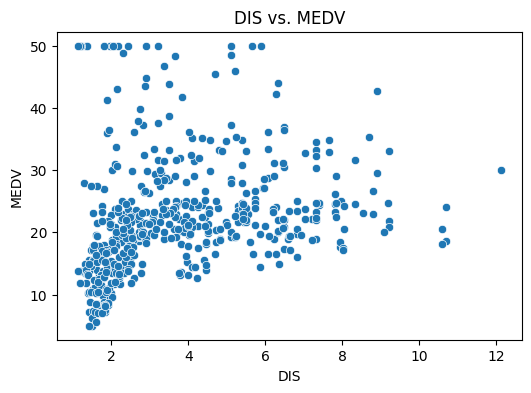

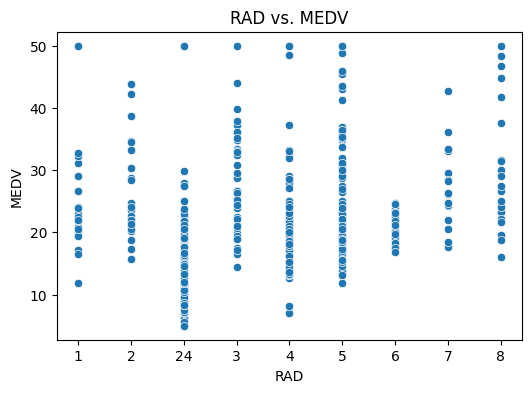

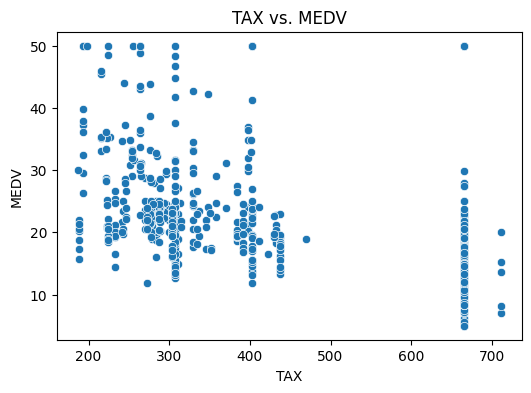

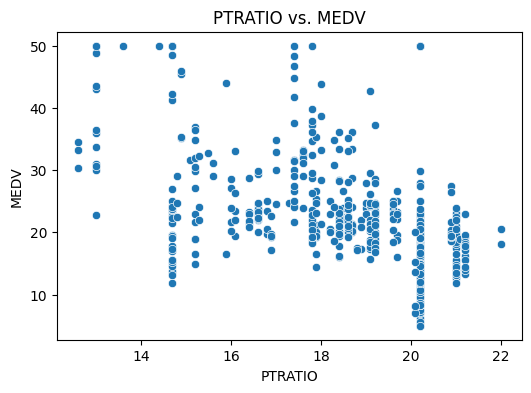

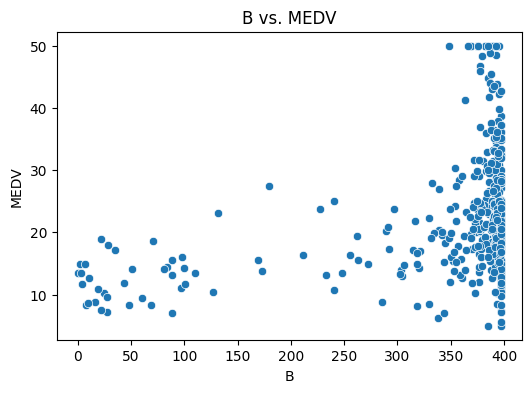

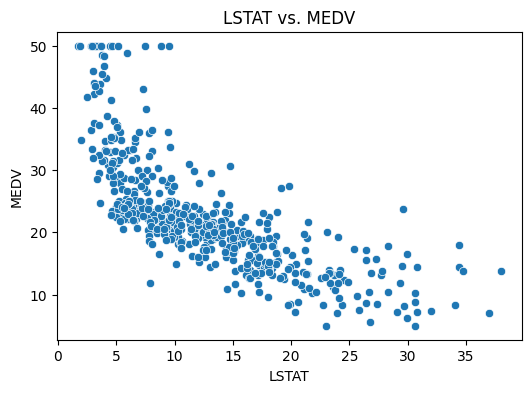

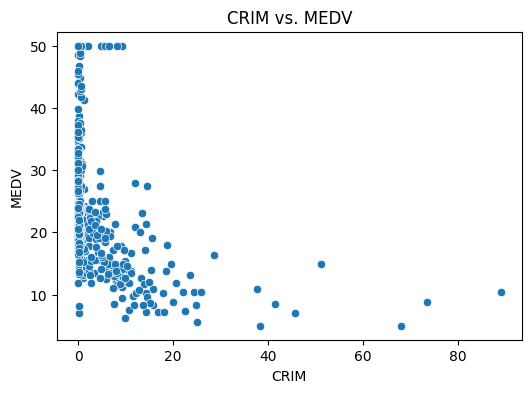

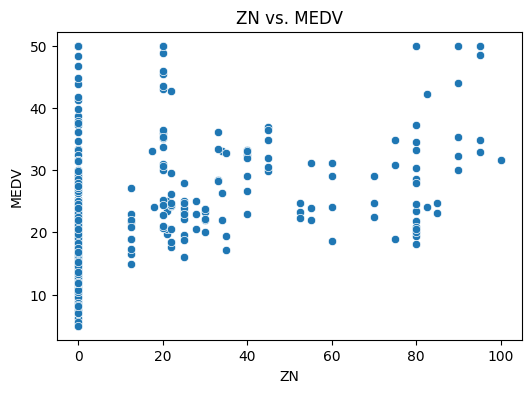

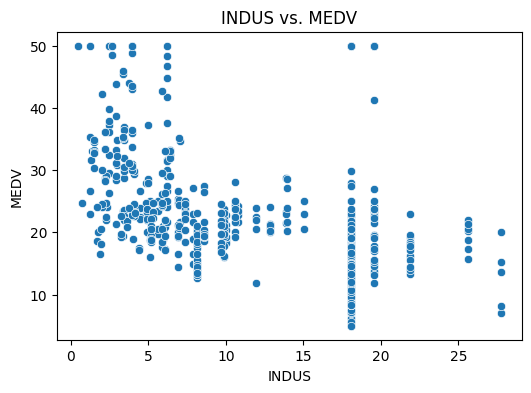

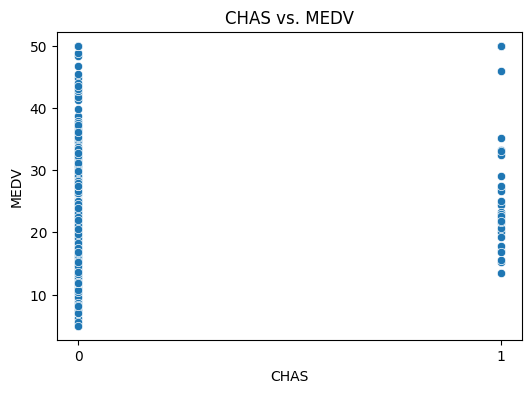

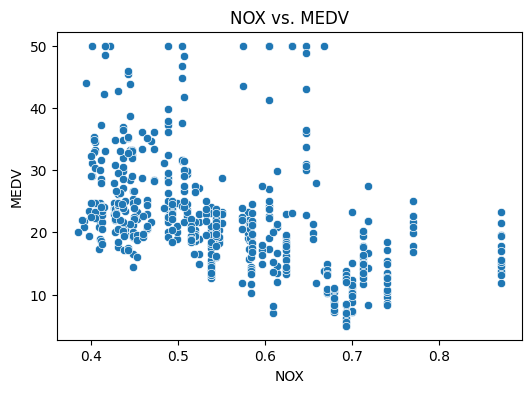

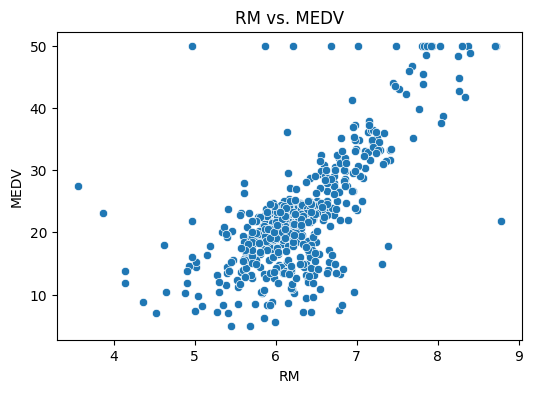

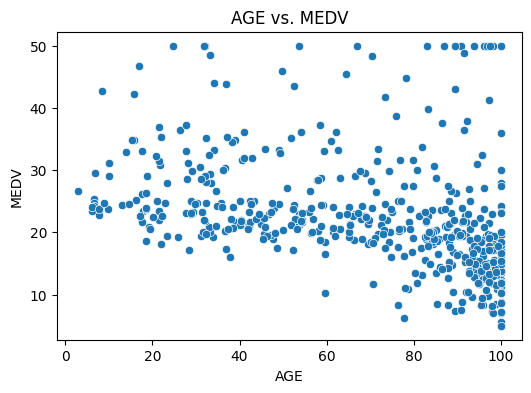

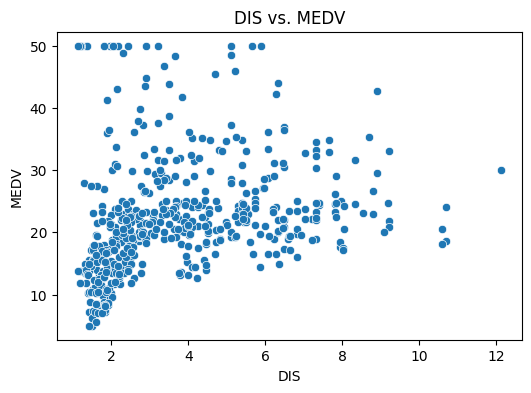

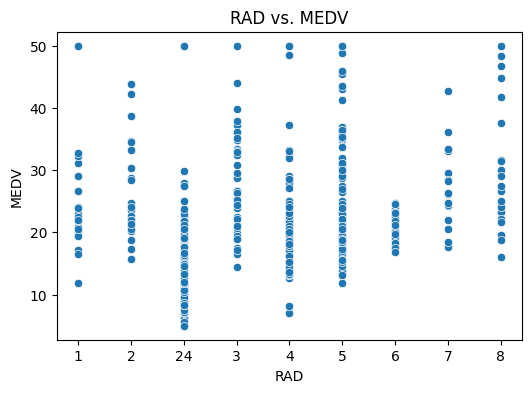

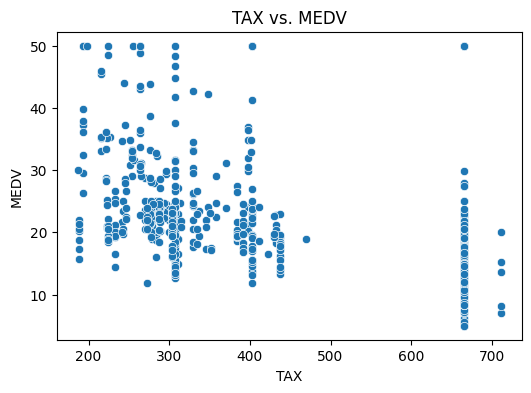

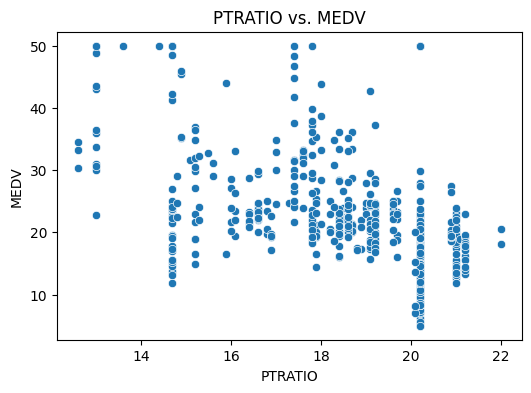

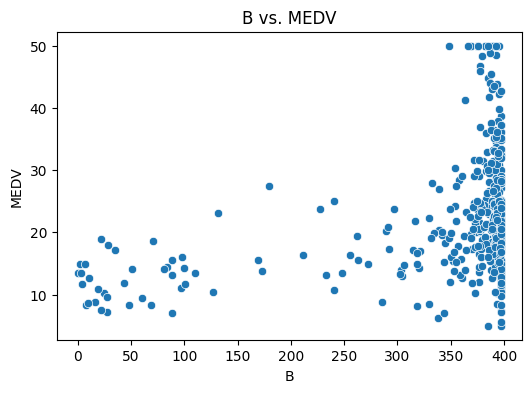

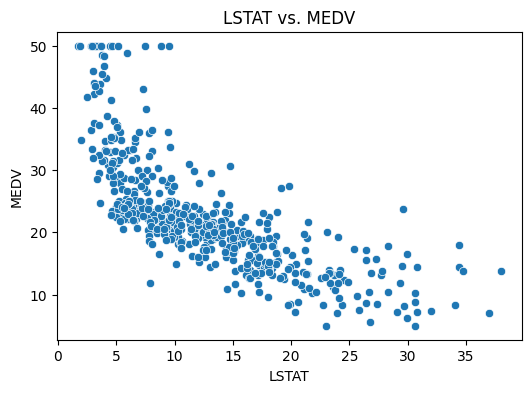

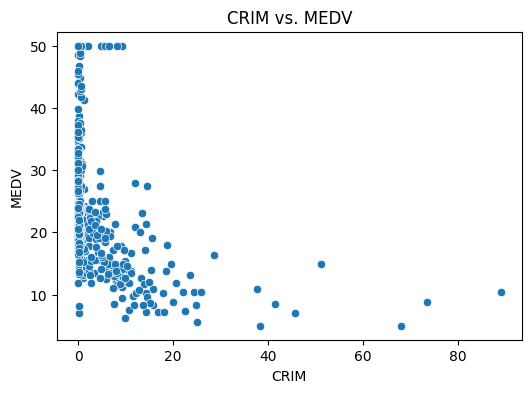

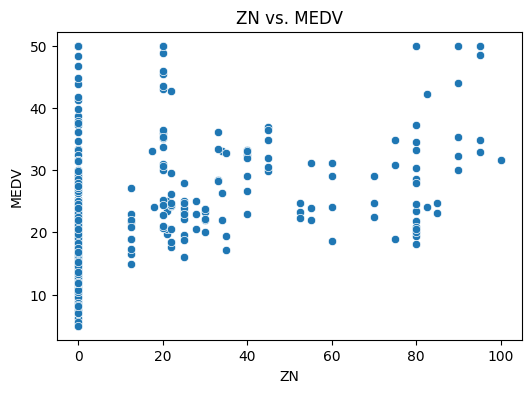

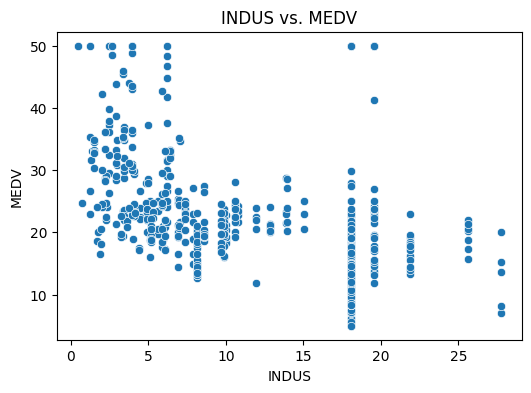

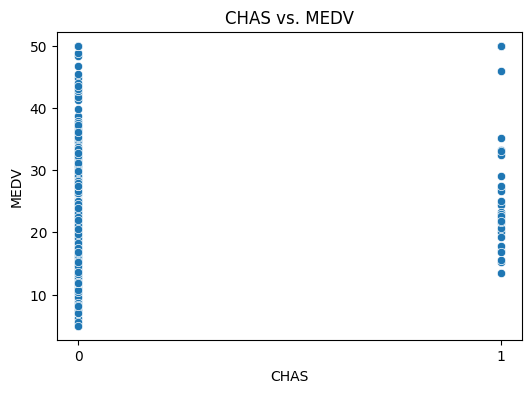

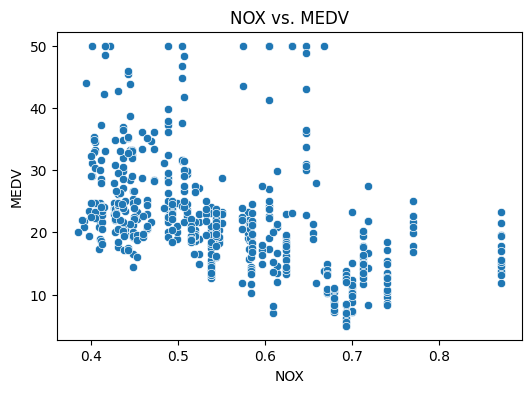

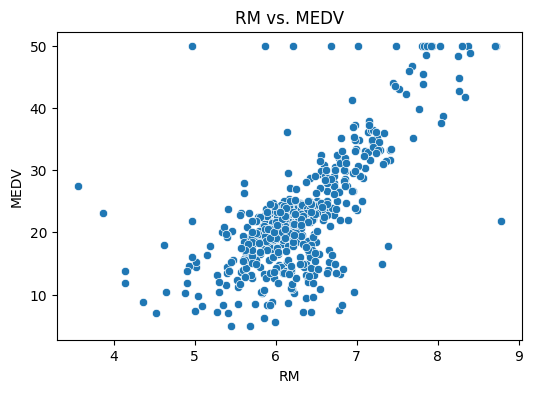

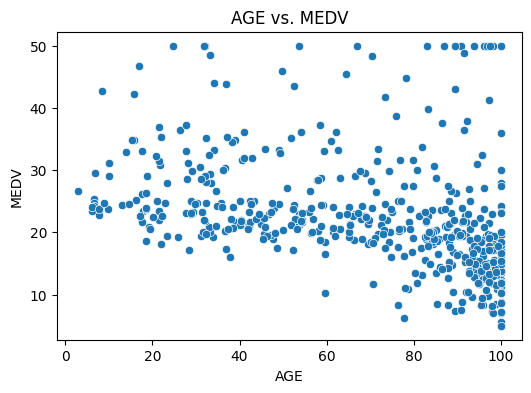

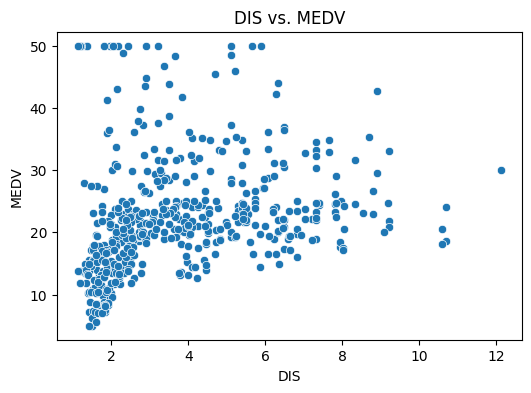

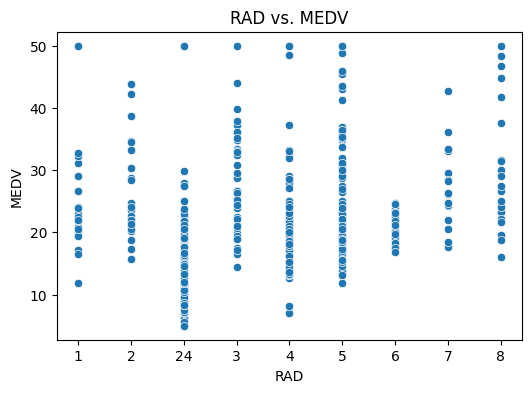

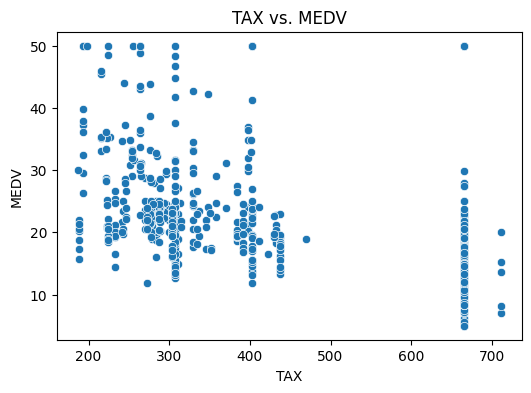

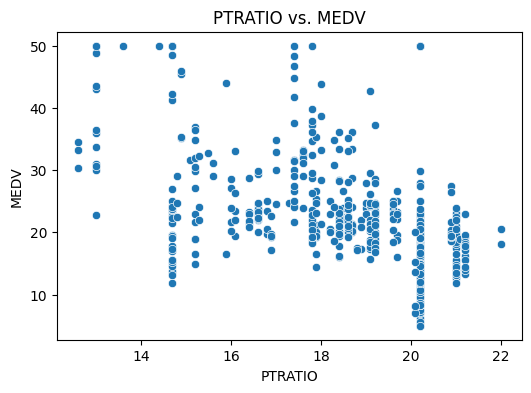

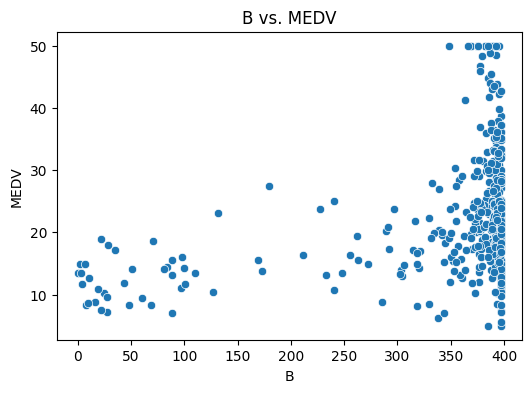

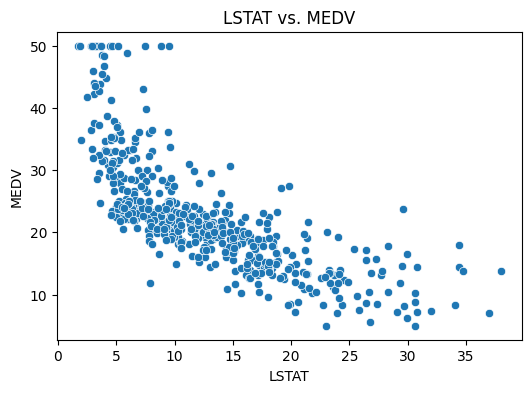

In [5]:
# TODO: Visualize the data. Create scatter plots to see the relationship between independent features and the target variable.
# Example: Use `plt.scatter()` to visualize the relationship between features like 'RM' (average number of rooms) and the target ('MEDV').

# Add your code here:


# TODO: Create a function to automate scatter plots for all features vs the target variable.
# Hint: The function should loop over a list of features and plot scatter plots for each.

# Define your function here:
# Function to automate scatter plots for all features vs target
def scatter_all_features(df, target):
    for col in df.columns[:-1]:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"{col} vs. {target}")
        plt.xlabel(col)
        plt.ylabel(target)
        plt.show()

# TODO: Use the function to visualize the relationships between multiple features and the target variable.
# Example: ['RM', 'LSTAT', 'AGE', 'CRIM']
# Target: 'MEDV'
# Plot a focused subset first, then all features
subset = ["RM", "LSTAT", "AGE", "CRIM"]
for col in subset:
    if col in df.columns:
        scatter_all_features(df, "MEDV")
# Add your code here:
scatter_all_features(df, 'MEDV')

In [6]:
# --- ML Model Training ---
# TODO: Split the dataset into training and testing sets.
# Hint: Use `train_test_split()` from `sklearn.model_selection` with an 80/20 split.

# Define X (features) and y (target) and perform the train-test split:


# TODO: Choose an appropriate regression model: Decision Tree or Random Forest.
# Hint: Use either `DecisionTreeRegressor` or `RandomForestRegressor` from `sklearn.tree` or `sklearn.ensemble`.

# Define your regression model here:


# TODO: Train the model on the training data.
# Hint: Use `.fit()` to train the model.

# Add your code here:
X = df[boston.feature_names]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# --- Model Evaluation ---
# TODO: Evaluate the performance of the model on the test set using relevant metrics (e.g., RMSE, R-squared).
# Hint: Use `mean_squared_error()` and `r2_score()` from `sklearn.metrics`.

# Perform parameter tuning on the model if needed to improve the performance of your model.

# Add your parameter tuning code here:
# Decision Tree
dt_pred = dt_model.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)
print(f"Decision Tree RMSE: {dt_rmse}")
print(f"Decision Tree R-squared: {dt_r2}")

# Random Forest
rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R-squared: {rf_r2}")

# Example: GridSearchCV for Random Forest to tune n_estimators, max_depth, etc.
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20]
}
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best score (negative MSE):", grid.best_score_)

# Predict on the test set and calculate the evaluation metrics:


# --- Model Prediction ---
# TODO: Predict house prices from a new set of feature inputs.
# Example new data: Use hypothetical or randomly generated values for the features.
#
# Example new data: CRIM = 0.2, ZN = 12.5, INDUS = 7.07, CHAS = 0, NOX = 0.5, RM = 6.5, AGE = 68, DIS = 4.0, RAD = 2, TAX = 250, PTRATIO = 17, B = 400, LSTAT = 12

# Add your prediction code here:
# Example: Predict for a new input (edit with realistic values as needed)
sample = np.array([[0.03, 25, 5.13, 0, 280, 15.3, 396.9, 4.98, 1, 296, 15.3, 396.9, 4.98]]) # example
sample = sample[:, :13]  # Only use first 13 features (if necessary)
dt_new_pred = dt_model.predict(sample)
rf_new_pred = rf_model.predict(sample)
print(f"Predicted price (Decision Tree): {dt_new_pred[0]:.2f}")
print(f"Predicted price (Random Forest): {rf_new_pred[0]:.2f}")





Decision Tree RMSE: 3.2273949915330395
Decision Tree R-squared: 0.8579634380978161
Random Forest RMSE: 2.8109631609391226
Random Forest R-squared: 0.8922527442109116
Best parameters: {'max_depth': 10, 'n_estimators': 50}
Best score (negative MSE): -15.957300908524767
Predicted price (Decision Tree): 21.90
Predicted price (Random Forest): 41.33


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
